# Replikacija podataka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")

#### Fig. 1. Number of students in 4 categories: Withdrawn, Failed, Pass, Distinction 


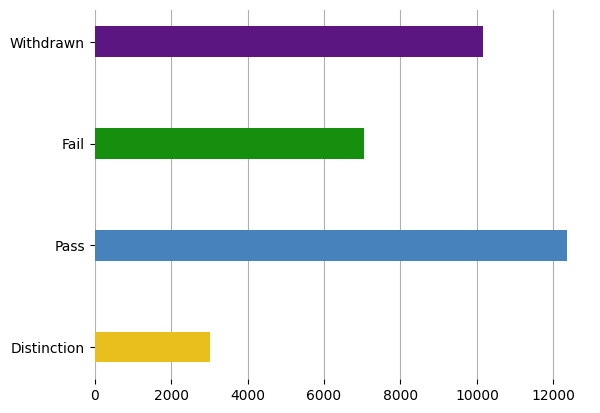

In [3]:
result = studentInfo['final_result'].unique()

result_count = studentInfo['final_result'].value_counts()

#sorted_result_count = result_count.sort_index()
#sorted_result = sorted(result)
custom_order = ['Distinction','Pass','Fail','Withdrawn']
sorted_result_count = result_count.loc[custom_order]

colors=['#e8bf1c','#4882bd','#178f0e','#5c1682']

fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
left_side = ax.spines["left"]
left_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
bottom_side = ax.spines["bottom"]
bottom_side.set_visible(False)


plt.grid(axis='x', 
         zorder=0)
plt.barh(sorted_result_count.index, 
         sorted_result_count,
         color=colors, 
         height=0.3, 
         zorder = 5)


plt.show()


#### Table 1. Information about MOOCs. 

In [95]:
fa_date = assessments.groupby('code_module')['date'].min().reset_index()
reg_st = studentRegistration.groupby('code_module')['id_student'].count().reset_index()
year_run  = courses.groupby('code_module')['code_presentation'].agg(list).reset_index()

table1 = pd.merge(fa_date, reg_st, on='code_module')
table1 = pd.merge(table1, year_run, on='code_module')

print(table1)


  code_module  date  id_student code_presentation
0         AAA  19.0         748    [[2013, 2014]]
1         BBB  12.0        7909    [[2013, 2014]]
2         CCC  18.0        4434          [[2014]]
3         DDD  20.0        6272    [[2013, 2014]]
4         EEE  33.0        2934    [[2013, 2014]]
5         FFF  19.0        7762    [[2013, 2014]]
6         GGG  61.0        2534    [[2013, 2014]]


#### Table 2. Pearson’s Correlation test result

pokušaj sa djelomičnim tablicama

In [4]:
merged_studentInfo_studentAssessment = pd.merge(studentInfo, studentAssessment, on='id_student')
merged_studentInfo_studentAssessment.dropna(inplace=True)

merged_studentInfo_studentRegistration = pd.merge(studentInfo, studentRegistration, on='id_student')
merged_studentInfo_studentRegistration.dropna(inplace=True)

studentVel_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()

merged_studentInfo_studentVle = pd.merge(studentInfo, studentVel_sum, on='id_student')
merged_studentInfo_studentVle.dropna(inplace=True)

merged_studentRegistration_studentVle = pd.merge(studentRegistration, studentVel_sum, on='id_student')
merged_studentRegistration_studentVle.dropna(inplace=True)

merged_studentAssessment_studentVle = pd.merge(studentAssessment, studentVle, on='id_student')
merged_studentAssessment_studentVle.dropna(inplace=True)

merged_studentRegistration_studentAssessment = pd.merge(studentRegistration, studentAssessment, on='id_student')
merged_studentRegistration_studentAssessment.dropna(inplace=True)

#1.30


In [5]:
from scipy.stats import pearsonr
from sklearn import preprocessing 

merged_list = ['merged_studentInfo_studentAssessment','merged_studentInfo_studentRegistration',
               'merged_studentInfo_studentVle','merged_studentRegistration_studentVle',
               'merged_studentAssessment_studentVle','merged_studentRegistration_studentAssessment']
merged_list_notdef = [merged_studentInfo_studentAssessment,merged_studentInfo_studentRegistration,
               merged_studentInfo_studentVle,merged_studentRegistration_studentVle,
               merged_studentAssessment_studentVle,merged_studentRegistration_studentAssessment]
rows_csv = {"Gender" : "studentInfo", 
        "Educational Level" : "studentInfo", 
        "Age": "studentInfo", 
        "Previous Attempts": "studentInfo",
          "Disability": "studentInfo",
          "First Assig.Mark": "studentAssessment", 
          "Registration Date": "studentRegistration" ,
          "Clicks till Course Start": "studentVle"}
rows_csv_notdef = {"Gender" : studentInfo, 
        "Educational Level" : studentInfo, 
        "Age": studentInfo, 
        "Previous Attempts": studentInfo,
          "Disability": studentInfo,
          "First Assig.Mark": studentAssessment, 
          "Registration Date": studentRegistration ,
          "Clicks till Course Start": studentVle}
atributes = {"Gender" : "gender", 
        "Educational Level" : "highest_education", 
        "Age": "age_band", 
        "Previous Attempts": "num_of_prev_attempts",
          "Disability": "disability",
          "First Assig.Mark": "score", 
          "Registration Date": "date_registration" ,
          "Clicks till Course Start": "sum_click"}
#table
rows = ["Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data = []
table_rows = ["", "Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data.append(table_rows)

for r1 in range(0,len(rows)):
    tab_redak = []
    tab_redak.append(rows[r1])
    for r2 in range(0,len(rows)):
        #print('gledam za ' + rows[r1] + ' i ' +rows[r2] )
        row = rows[r1]  #ime prvog elementa
        column = rows[r2] #ime drugog elementa
        table_row = rows_csv[row] #u kojoj je tablici e1
        table_column = rows_csv[column] #u kojoj je tablici e2
        
        for naziv in merged_list:
            #print(table_row, table_column)
            #print('naziv:', naziv)
            if (table_row in naziv and table_column in naziv):
                #dobijem naziv atributa u tablici
                
                
                atr1 = atributes[row]
                atr2 = atributes[column]
                
                #print('atributi:',atr1, atr2)
                index = merged_list.index(naziv)
                #dobijem naziv tablice
                naziv_notdef = merged_list_notdef[index]
                #ako su tipovi atribuita object onda, label
                if atr1 == atr2:
                    naziv_notdef = rows_csv_notdef[row]
                    naziv_notdef.dropna(inplace=True)

                    
                list1 = naziv_notdef[atr1]
                list2 = naziv_notdef[atr2]
                label_encoder = preprocessing.LabelEncoder() 
                
                if (naziv_notdef[atr1].dtype == "object"):
                    #print('label encoder 1')
                    list1 = label_encoder.fit_transform(list1) 
                
                if (naziv_notdef[atr2].dtype == "object"):
                    #print('label encoder 2')
                    list2 = label_encoder.fit_transform(list2) 
                
                #list1 = [x for x in list1 if not np.isnan(x)]
                #list2 = [x for x in list2 if not np.isnan(x)]

                corr, _ = pearsonr(list1, list2)
                tab_redak.append( round(corr, 2))
                #print('corr:',corr)
                break
    #print('tab_redak:', tab_redak)
    table_data.append(tab_redak)
    tab_redak = []
    
#30s

del merged_studentInfo_studentAssessment
del merged_studentInfo_studentRegistration
del merged_studentInfo_studentVle
del merged_studentRegistration_studentVle
#del merged_studentAssessment_studentVle
del merged_studentRegistration_studentAssessment



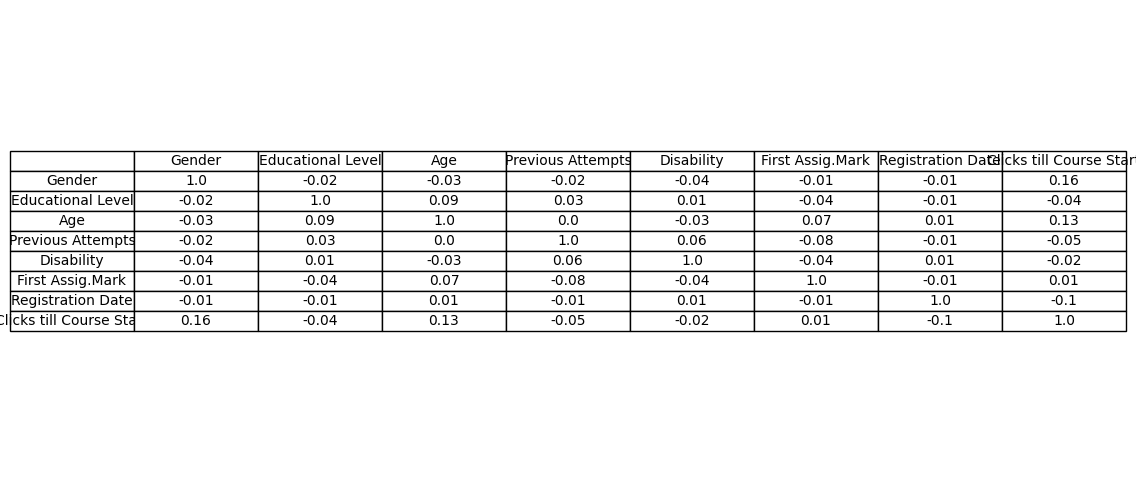

In [6]:
#ispis tablice
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

# Optionally, format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()



pokušaj sa cijelom tablicom samo sa određenim podatcima

In [6]:

columns_studentInfo = ['id_student','gender', 'age_band', 'disability', 'num_of_prev_attempts', 'highest_education']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']


# Merge DataFrames
merged_table = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')

merged_table = pd.merge(merged_table,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table = pd.merge(merged_table,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table.dropna(inplace=True)

# 10s


In [7]:
from scipy.stats import pearsonr
from sklearn import preprocessing 

rows_csv = {"Gender" : "studentInfo", 
        "Educational Level" : "studentInfo", 
        "Age": "studentInfo", 
        "Previous Attempts": "studentInfo",
          "Disability": "studentInfo",
          "First Assig.Mark": "studentAssessment", 
          "Registration Date": "studentRegistration" ,
          "Clicks till Course Start": "studentVle"}

atributes = {"Gender" : "gender", 
        "Educational Level" : "highest_education", 
        "Age": "age_band", 
        "Previous Attempts": "num_of_prev_attempts",
          "Disability": "disability",
          "First Assig.Mark": "score", 
          "Registration Date": "date_registration" ,
          "Clicks till Course Start": "sum_click"}
#table
rows = ["Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data = []
table_rows = ["", "Gender", "Educational Level", "Age", "Previous Attempts",
          "Disability", "First Assig.Mark", "Registration Date" ,"Clicks till Course Start"]
table_data.append(table_rows)

for r1 in range(0,len(rows)):
    tab_redak = []
    tab_redak.append(rows[r1])
    for r2 in range(0,len(rows)):
        row = rows[r1]  #ime prvog elementa
        column = rows[r2] #ime drugog elementa
        table_row = rows_csv[row] #u kojoj je tablici e1
        table_column = rows_csv[column] #u kojoj je tablici e2
        
                
        atr1 = atributes[row]
        atr2 = atributes[column]
        list1 = merged_table[atr1]
        list2 = merged_table[atr2]
        label_encoder = preprocessing.LabelEncoder() 
                
        if (merged_table[atr1].dtype == "object"):
                    list1 = label_encoder.fit_transform(list1) 
                
        if (merged_table[atr2].dtype == "object"):
                    list2 = label_encoder.fit_transform(list2) 
                
                

        corr, _ = pearsonr(list1, list2)
        tab_redak.append( round(corr, 2))
                
    #print('tab_redak:', tab_redak)
    table_data.append(tab_redak)
    
del merged_table
# 6min 21s

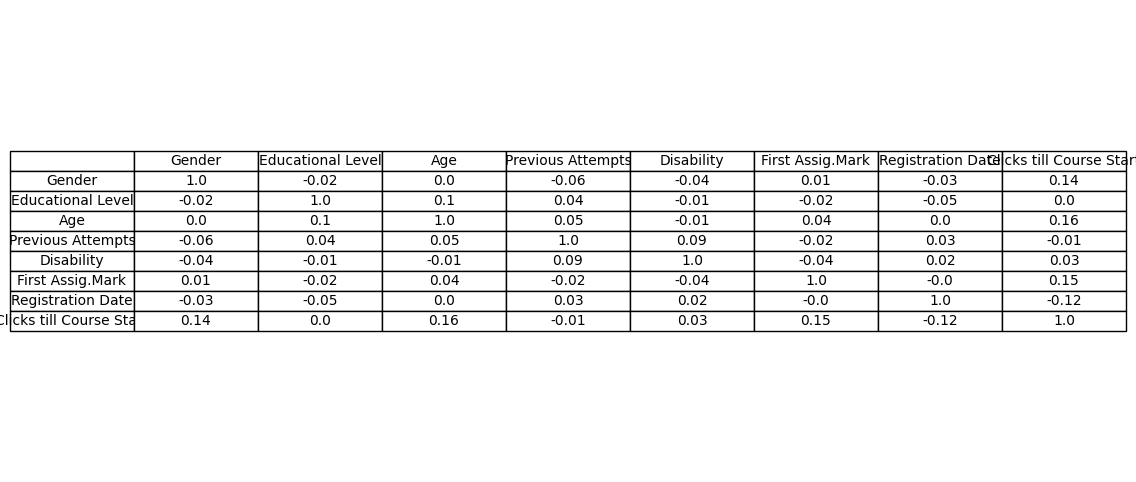

In [8]:
#ispis tablice
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None)

# Optionally, format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

#### Table 3. Performance comparisons between three predictive models 


"The chosen variables for
the resulting csv file used to train our learning algorithms included the First Assignment
Mark, Educational Level, Clicks till Course Starts, Registration date, Age, and Gender.
70% of the data were used as the training data, and 30% as the test data."

In [9]:

columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
#df.to_csv('merged_table_2.csv',index=False)


#uzet ću prvih 10 000 redaka
#merged_table_2 = df.sample(n=10000, random_state=42)
#merged_table_2.to_csv('merged_table_2.csv',index=False)




DECISION TREE

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pandas as pd
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [205]:
def decision_tree(value,dataDT):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, average='weighted')
    dataDT.append(precision)
    dataDT.append(recall)
    dataDT.append(f1_score)
    dataDT.append(accuracy)
    
    #ROC
    probabilities = clf.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataDT.append(fpr)
    dataDT.append(tpr)
    dataDT.append(thresholds)
    dataDT.append(roc_auc)
    


    if value == 'Pass':
        return confusion_matrix(y_test, predictions)
    del X_train, X_test, y_train, y_test, clf

In [206]:

cm_decision_tree = []
df = pd.DataFrame(merged_table_2)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 


values =['Withdrawn','Fail','Pass','Distinction']
dataDT = []
for i in values:
    
    
    if i == 'Pass':
       cm_decision_tree = decision_tree(i,dataDT)
    else:
        decision_tree(i,dataDT)
    

del df    


RANDOM FOREST

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [201]:
def random_forest(dataRF, value):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
    clf = RandomForestClassifier(n_estimators=10, random_state=42)  

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, average='weighted')
    dataRF.append(precision)
    dataRF.append(recall)
    dataRF.append(f1_score)
    dataRF.append(accuracy)
    
    #ROC
    probabilities = clf.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataRF.append(fpr)
    dataRF.append(tpr)
    dataRF.append(thresholds)
    dataRF.append(roc_auc)
    

    
    
    if value == 'Pass':
        return confusion_matrix(y_test, predictions)

In [202]:

df = pd.DataFrame(merged_table_2)
cm_random_forest = []
label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

data_random_forest = {}


values =['Withdrawn','Fail','Pass','Distinction']
dataRF = []
for i in values:
    
    if i == 'Pass':
       cm_random_forest = random_forest(dataRF,i)
    else:
        random_forest(dataRF,i)
del df


BART

In [163]:
from sklearn.model_selection import train_test_split
from bartpy.sklearnmodel import SklearnModel
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, roc_auc_score



In [178]:
def BARTT(dataB,value):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = SklearnModel()
    
    ######################### greška 
    #Parameters:	
        #X (pd.DataFrame) – training covariates
        #y (np.ndarray) – training targets
        #numpy_array = pandas_series.values
    y_train_bart = y_train.values
    model.fit(X_train, y_train_bart)
    predictions_binary = model.predict(X_test)
    def map_to_123(value2):
        if value2 < 0.5:
            return 0
        else:
            return 1
   
    transformed_list = [map_to_123(value2) for value2 in predictions_binary]


 
    
    accuracy = accuracy_score(y_test, transformed_list)
    #print(f'Accuracy: {accuracy}')
    #print(f'Score: {score}')

    #print('Classification Report:')
    #print(classification_report(y_test, transformed_list))
    
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, transformed_list, average='weighted')
    dataB.append(precision)
    dataB.append(recall)
    dataB.append(f1_score)
    dataB.append(accuracy)
    
    
    #ROC GRAF za distinction
    """ decision_values = model.decision_function(X_test)
    probabilities = 1 / (1 + np.exp(-decision_values))
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    dataB.append(fpr)
    dataB.append(tpr)
    dataB.append(thresholds)
    dataB.append(roc_auc)
     """

    if value == 'Pass':
        return confusion_matrix(y_test, transformed_list)

In [179]:

cm_BART = []

#df = pd.DataFrame(merged_table_2)
df = pd.DataFrame(merged_table_2)
df = df.sample(n=1000, random_state=42)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 


values =['Withdrawn','Fail','Pass','Distinction']
dataB=[]
for i in values:
    
    if i == 'Pass':
       cm_BART = BARTT(dataB,i)
    else:
        BARTT(dataB,i)
del df
print(dataB)
#3min33s

AttributeError: 'SklearnModel' object has no attribute 'decision_function'

#### Table 4. Confusion Matrix for Pass versus the rest 


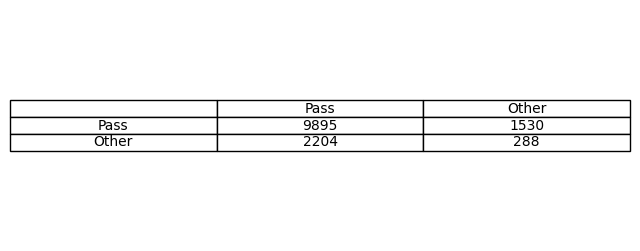

In [160]:
table_data_3 = [
    ['','Pass','Other'],
    ['Pass', cm_decision_tree[0][0],cm_decision_tree[0][1]],
    ['Other', cm_decision_tree[1][0],cm_decision_tree[1][1]],
]

#ispis tablice
fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table_data_3, loc='center', cellLoc='center', colLabels=None)

plt.show()


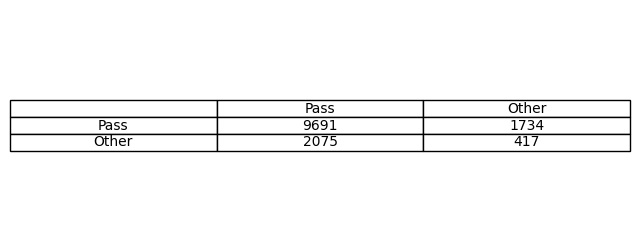

In [161]:
table_data_4 = [
    ['','Pass','Other'],
    ['Pass', cm_random_forest[0][0],cm_random_forest[0][1]],
    ['Other', cm_random_forest[1][0],cm_random_forest[1][1]],
]

#ispis tablice
fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table_data_4, loc='center', cellLoc='center', colLabels=None)

plt.show()

#### Fig. 3. BART (Left) Random Forest (Right) Decision Tree (Right) AUC graphs for Distinction versus the rest

ROC Random forest

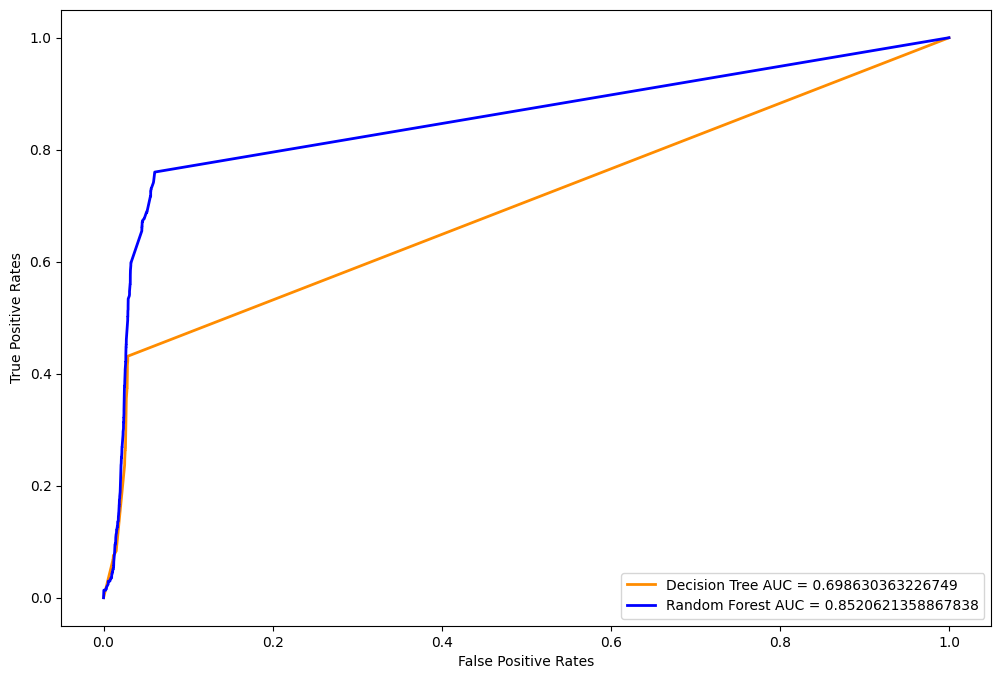

In [212]:


fpr_dt = dataDT[28]
tpr_dt = dataDT[29]
roc_auc_dt = dataDT[31]

plt.figure(figsize=(12, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree AUC = ' + str(roc_auc_dt))

# Plot  dataRF
fpr_rf = dataRF[28]
tpr_rf = dataRF[29]
roc_auc_rf = dataRF[31]

plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest AUC = ' + str(roc_auc_rf))

plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend(loc='lower right')
plt.show()


#### Fig. 4. Relationship between the number of clicks and the overall student outcome 


In [19]:
merged_data_3 = merged_table_2.groupby('id_student').agg({'score': 'mean', 'sum_click': 'mean'}).reset_index()
merged_data_3.dropna(inplace=True)
merged_data_3 = pd.merge(merged_data_3, studentInfo, on='id_student')
merged_data_3 = merged_data_3[merged_data_3['final_result'] != 'Withdrawn']


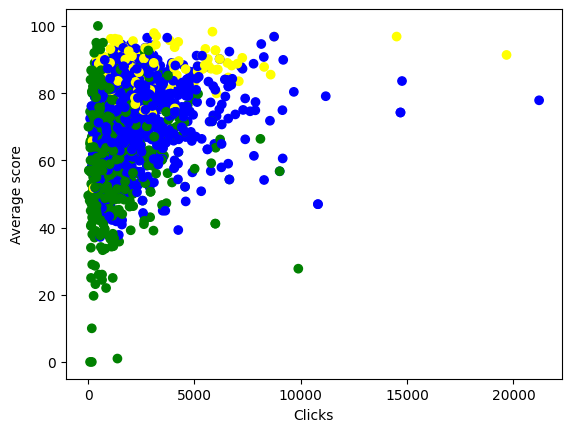

In [20]:


color_mapping = {'Pass': 'blue','Fail': 'green', 'Distinction': 'yellow'}

colors = merged_data_3['final_result'].map(color_mapping)

plt.scatter(merged_data_3['sum_click'], merged_data_3['score'],c=colors)
plt.xlabel('Clicks')
plt.ylabel('Average score')
plt.show()